In [2]:
from torchcodec.decoders import VideoDecoder
import torchvision


stream = "video"
video = torchvision.io.VideoReader("processed_240p_videos/dance2.mp4", stream)
video.get_metadata()


{'video': {'fps': [29.97], 'duration': [21.354688021354686]}}

/tmp/ipykernel_807853/1135233974.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  video_frames = torch.load("processed_240p_tensors/dance2.pt")[0]


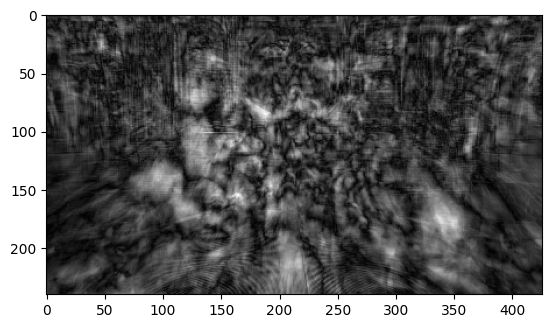

In [6]:
import numpy as np
import cv2
import torch

# 假设 video_frames 是一个形状为 (N, H, W) 的 numpy 数组，N 是帧数，H 和 W 是帧的高度和宽度
# video_frames = np.random.rand(100, 256, 256)  # 示例数据
video_frames = torch.load("processed_240p_tensors/dance2.pt")[0]

# 初始化频域表示
freq_domain = np.zeros_like(video_frames, dtype=complex)

# 对每个像素进行傅里叶变换
for i in range(video_frames.shape[1]):
    for j in range(video_frames.shape[2]):
        time_series = video_frames[:, i, j]
        freq_domain[:, i, j] = np.fft.fft(time_series)

# 计算幅度谱
magnitude_spectrum = np.abs(freq_domain)

# 可视化某一频率的幅度谱
import matplotlib.pyplot as plt
plt.imshow(magnitude_spectrum[10], cmap='gray')
plt.show()

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取视频文件
video_path = 'your_video.mp4'  # 替换为你的视频文件路径
cap = cv2.VideoCapture(video_path)

# 存储视频帧的亮度值
frames = []
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    # 将帧转换为灰度图并获取亮度值
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frames.append(gray_frame.mean())  # 存储每帧的平均亮度

cap.release()

# 将帧转换为 numpy 数组
signal = np.array(frames)

# 进行离散傅里叶变换
frequencies = np.fft.fft(signal)
frequencies_magnitude = np.abs(frequencies)

# 频谱图
plt.figure(figsize=(12, 6))
plt.plot(frequencies_magnitude)
plt.title('Frequency Spectrum of Video')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

(640,)